# **HEALTHCARE INSURANCE DATA ANALYSIS - PROJECT 1**

## Objectives

* The project aims to explore how personal and geographic attributes influence healthcare insurance costs and to build a predictive model to estimate insurance charges"

## Inputs

#### Dataset
- File Name: insurance.csv
- Location: inside the data/ folder
- Format: CSV (Comma-Separated Values) 



| Column Name | Description                                                            |
| ----------- | ---------------------------------------------------------------------- |
| `age`       | Age of the individual (in years)                                       |
| `sex`       | Gender (`male` or `female`)                                            |
| `bmi`       | Body Mass Index (numeric)                                              |
| `children`  | Number of children/dependents covered by insurance                     |
| `smoker`    | Smoking status (`yes` or `no`)                                         |
| `region`    | Geographic region (`southwest`, `southeast`, `northwest`, `northeast`) |
| `charges`   | Individual medical costs billed by health insurance (target variable)  |


## Outputs

#### Files

A cleaned and transformed version of the original dataset (insurance_cleaned.csv), saved in the ../data/ folder.

This file includes:

- One-hot encoded variables (e.g., smoker_yes, region_northwest, etc.)

- A new column: bmi_category (underweight, normal, overweight, obese)

#### DataFrames (in memory)

- df_encoded: The final processed dataset used for modeling and visualisation.

- df: Original dataset with added features (before encoding), useful for EDA.

#### Ready For

- Visual analysis (in the visualisations.ipynb notebook)


## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Section 1

Section 1 content

In [4]:
# import library

import pandas as pd

### Load the Insurance_dataset from Kaggle

[link dataset on Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data)

In [5]:
df = pd.read_csv('../data\inputs\insurance_dataset.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\slych\AppData\Local\Temp\ipykernel_12292\2254197651.py:1: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv('../data\inputs\insurance_dataset.csv')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# View basic info and sample data
df.head()
df.tail

<bound method NDFrame.tail of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
# view data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

---

In [8]:
# view Shape of the dataset: number of rows and columns
df.shape

(1338, 7)

In [9]:
# 2. Identify Missing Data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Identify duplicate rows
df.duplicated().sum()

np.int64(1)

In [12]:
# Summary statistics of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Summary of initilal datase exploration before cleaning and transformation

| Feature    | Data Type | Description                                                  | Observations / Issues Detected                     |
| ---------- | --------- | ------------------------------------------------------------ | -------------------------------------------------- |
| `age`      | Integer   | Age of the policyholder                                      | Ranges from 18 to 64 years. No missing values.     |
| `sex`      | Object    | Gender of the individual (`male`, `female`)                  | Two unique values. May need encoding for modeling. |
| `bmi`      | Float     | Body Mass Index – a health metric based on height and weight | Continuous values. No missing values.              |
| `children` | Integer   | Number of dependents covered under the insurance             | Ranges from 0 to 5. No missing values.             |
| `smoker`   | Object    | Smoking status (`yes`, `no`)                                 | Strong predictor. Needs conversion to numeric.     |
| `region`   | Object    | Geographic region (`northeast`, `southeast`, etc.)           | Categorical. Four unique values. No missing data.  |
| `charges`  | Float     | Insurance cost billed                                        | Highly skewed to the right. Target variable.       |


# Section 2

2. Transform: Clean and prepare the data

In [13]:
# Create BMI data categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

In [ ]:
# A. Apply the function to create a new column

df['bmi_category'] = df['bmi'].apply(bmi_category)

In [16]:
# B. Encode Categorical Variables (One-Hot Encoding)

# One-hot encode categorical variables, dropping the first to avoid dummy variable trap

df_encoded = pd.get_dummies(
    df, 
    columns=['sex', 'smoker', 'region', 'bmi_category'], 
    drop_first=True
)

In [18]:
# View the first and last few rows of transformed data
df_encoded.head(), df_encoded.tail()



(   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
 0   19  27.900         0  16884.92400     False        True             False   
 1   18  33.770         1   1725.55230      True       False             False   
 2   28  33.000         3   4449.46200      True       False             False   
 3   33  22.705         0  21984.47061      True       False              True   
 4   32  28.880         0   3866.85520      True       False              True   
 
    region_southeast  region_southwest  bmi_category_Obesity  \
 0             False              True                 False   
 1              True             False                  True   
 2              True             False                  True   
 3             False             False                 False   
 4             False             False                 False   
 
    bmi_category_Overweight  bmi_category_Underweight  
 0                     True                     False  
 1      

In [20]:
# Save the transformed dataset to a new CSV file
df_encoded.to_csv('../data/outputs/insurance_dataset_transformed.csv', index=False)

#### Summary of the transformations:

1. Created a new column 'bmi_category' based on BMI value
2. Applied one-hot encoding to categorical variables
3. Saved the transformed dataset to a new CSV file

# Section 3

---

### Loading and Visualisations of transformed data

In [24]:
# Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
# Step 2: Load the Transformed Data

df_encoded = pd.read_csv("../data\outputs\insurance_dataset_transformed.csv")

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\slych\AppData\Local\Temp\ipykernel_12292\1498632484.py:3: SyntaxWarning: invalid escape sequence '\o'
  df_encoded = pd.read_csv("../data\outputs\insurance_dataset_transformed.csv")


In [26]:
# Step 3: Set Seaborn Style

sns.set(style="whitegrid")

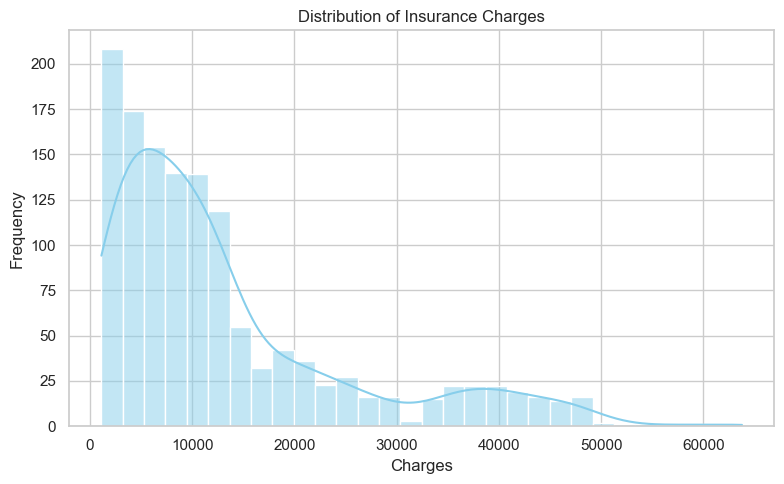

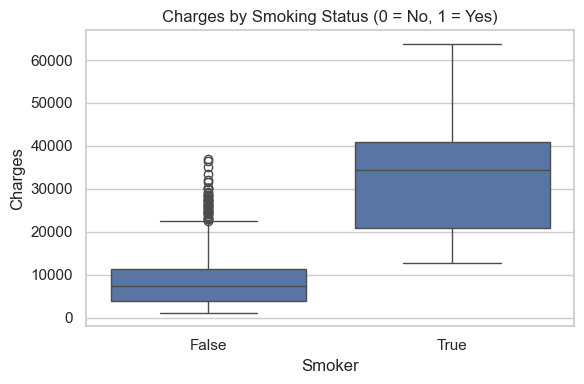

In [28]:
# Step 4: Distribution of Insurance Charges

plt.figure(figsize=(8, 5))
sns.histplot(df_encoded['charges'], kde=True, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 5: Charges by Smoking Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker_yes', y='charges', data=df_encoded)
plt.title('Charges by Smoking Status (0 = No, 1 = Yes)')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()



In [ ]:
# Step 6: Charges by BMI Category

df = pd.read_csv("../data\outputs\insurance_dataset_transformed.csv")
df['bmi_category'] = df['bmi'].apply(
    lambda x: 'underweight' if x < 18.5 else 'normal' if x < 25 else 'overweight' if x < 30 else 'obese'
)
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='bmi_category', y='charges', palette='pastel')
plt.title('Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

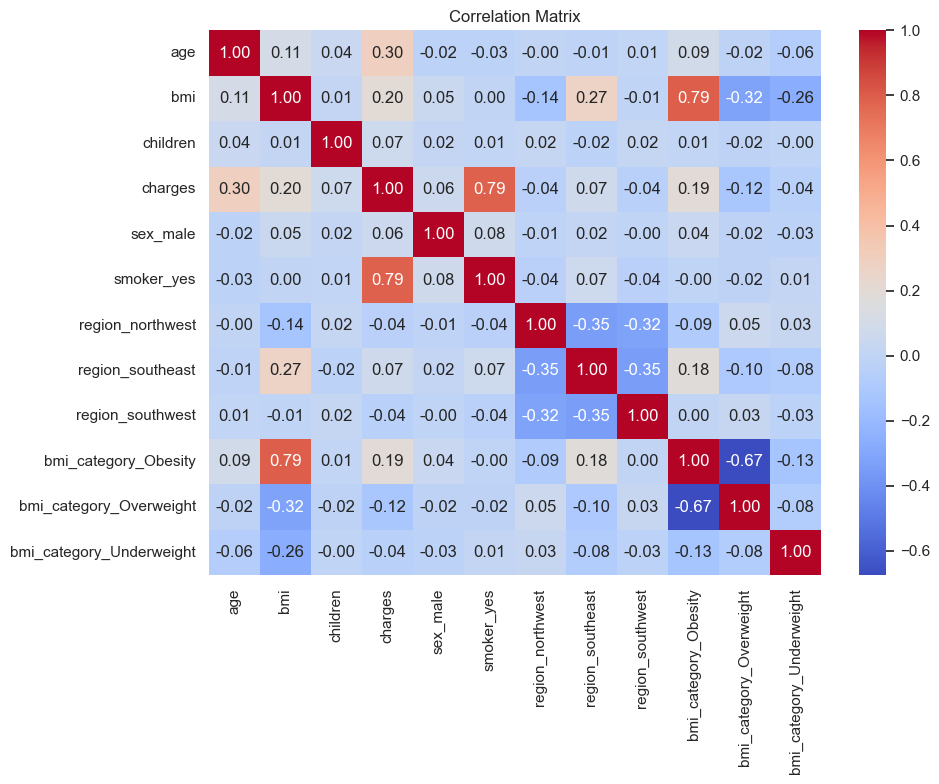

In [33]:
# Step 7: Correlation Heatmap

plt.figure(figsize=(10, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Comparison of Charges Between Smokers and Non-Smokers Using Plotly

In [4]:
import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.graph_objects as go


In [ ]:
# Load original dataset
df = pd.read_csv("../data\inputs\insurance_dataset.csv")

In [7]:
# Create a box plot

fig4 = px.box(
    df,
    x='smoker',
    y='charges',
    color='smoker',
    title='Do Smokers Pay More? (Insurance Charges)',
    labels={'smoker': 'Smoker', 'charges': 'Insurance Charges ($)'}
)

# Show the chart in browser or viewer
fig4.show()

### Insights from the Plot (Fig 4)

1. Smokers have significantly higher insurance charges
   The median (middle line of the box) for smokers is much higher than for non-smokers.

   This suggests that on average, smokers pay much more for insurance.

2. Greater variability in smoker charges
   The box for smokers is taller, and the whiskers (lines extending from the box) are longer.

   This means there’s more variation in insurance costs for smokers, possibly due to:

   Pre-existing conditions
   Age and BMI interaction
   Number of chronic illnesses

3. Presence of extreme outliers for smokers
   Smokers tend to have some very high-cost outliers, shown as dots above the whiskers.

   These could be heavy users of healthcare services or older individuals with multiple risk factors.



---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
